In [1]:
import rasterio 
import rasterio.plot

from osgeo import gdal

import os
import glob
import re
vrt_options = gdal.BuildVRTOptions(resampleAlg=gdal.GRA_NearestNeighbour, addAlpha=True)

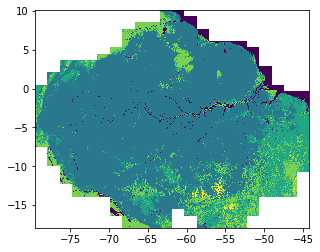

In [2]:
outdir = r'E:\acocac\research\AMZ\eval\pred\4_local\ep15\convgru\convgru128_010203_adam_fold0_MCD12Q1v6stable01to15_LCProp2_major_84993\2001'

fileNames = glob.glob(os.path.join(outdir,'prediction','*.tif'))

#sort dataframe by numeric format
fileNames.sort(key=lambda f: int(re.sub('\D', '', f)))

test_vrt = gdal.BuildVRT(os.path.join(os.dirname(outdir,'2001.vrt'), fileNames, options=vrt_options)

test_vrt = None

raster_vrt = rasterio.open(os.path.join(outdir,'2001.vrt'))

rasterio.plot.show(raster_vrt)

raster_vrt.close()

In [30]:
val mosaic = gdal.Warp(os.path.join(outdir,'test.tif'), raster_vrt, options=WarpOptions(gdal.ParseCommandLine("-srcnodata 0 -dstnodata -1 -overwrite -wm 3000 -co COMPRESS=LZW -s_srs EPSG:4326 -wo NUM_THREADS=val/ALL_CPUS")))

SyntaxError: invalid syntax (<ipython-input-30-acc2a0d96164>, line 1)

In [49]:
def export_raw(fileNames, outdir):
    cl_string = "-of GTiff -co COMPRESS=LZW -overwrite \
    -multi -wo NUM_THREADS=ALL_CPUS -s_srs EPSG:4326 -srcnodata 0 -dstnodata -9999"

    warp_options = gdal.WarpOptions(gdal.ParseCommandLine(cl_string))

    vrt_options = gdal.BuildVRTOptions(separate=False)
    vrt_output=os.path.join(outdir,'test.vrt')
    gdal.BuildVRT(vrt_output, fileNames, options=vrt_options)
    # warp_options = ""
    output_tiff = vrt_output.replace(".vrt", ".tif")

    if not os.path.exists(output_tiff):
        gdal.Warp(output_tiff, vrt_output, options=warp_options)

In [50]:
export_raw(fileNames, outdir)

In [24]:
ds = gdal.Warp(os.path.join(outdir,'test.tif'), raster_vrt, dstSRS='EPSG:4326',
               outputType=gdal.GDT_Int16)
ds = None

SystemError: <built-in function wrapper_GDALWarpDestName> returned NULL without setting an error

In [21]:
# kwargs = {'format': 'GTiff', 'geoloc': True}
# ds = gdal.Warp(os.path.join(outdir,'test.tif'), raster_vrt, **kwargs)
# del ds

In [22]:
raster_vrt.shape

(12672, 16128)

In [23]:
# Importar bibliotecas

# from rasterstats import zonal_stats
import rasterio
from rasterio import plot
from rasterio.plot import show
import os
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import numpy.ma as ma
from osgeo import gdal
import gdal
# from gdalconst import *
import glob
import re
import geopandas as gpd
from rasterio.mask import mask
import fiona
from rasterio.features import sieve